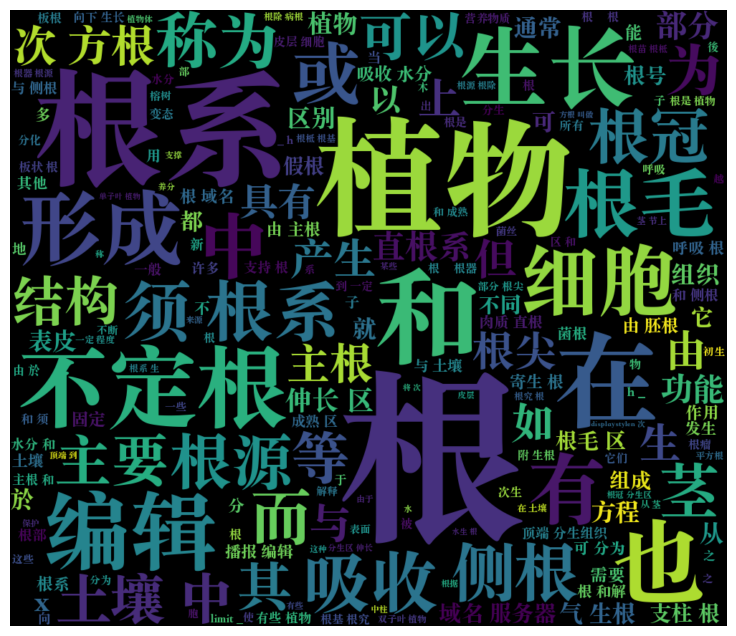

词云图已保存为 wordcloud.jpg


In [3]:
import os
from wordcloud import WordCloud
import jieba
import matplotlib.pyplot as plt
import codecs

# 动态获取 macOS 系统内置的中文字体路径
def get_mac_chinese_font():
    font_candidates = [
        "/System/Library/Fonts/Supplemental/Songti.ttc",  # 宋体
        "/System/Library/Fonts/Supplemental/PingFang.ttc",  # 苹方
        "/System/Library/Fonts/Supplemental/Heiti.ttc"  # 黑体
    ]
    for font_path in font_candidates:
        if os.path.exists(font_path):
            return font_path
    raise FileNotFoundError("无法找到适合的中文字体，请检查系统字体路径。")

# 获取字体路径
font_path = get_mac_chinese_font()

# 配置文件路径
mypath = 'context/'  # 包含多个文本文件的文件夹
stopwords_filename = 'stopwords.txt'  # 停用词文件路径

# 获取文件夹中的所有文本文件
files = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

# 合并所有文本文件内容
text_list = []
for file in files:
    with open(os.path.join(mypath, file), encoding='utf-8') as f:
        lines = f.readlines()
        text_list.append(' '.join(lines))
text = ' '.join(text_list)

# 使用 jieba 分词处理文本
text = ' '.join(jieba.cut(text.replace(" ", "")))

# 加载停用词
stopwords = set()
if os.path.exists(stopwords_filename):
    with codecs.open(stopwords_filename, 'r', 'utf-8') as f:
        stopwords = set([line.strip() for line in f])
else:
    print("停用词文件未找到，将不使用停用词过滤。")

# 生成词云
wordcloud = WordCloud(
    font_path=font_path,  # 动态选择中文字体
    prefer_horizontal=1,  # 单词水平显示的优先级
    stopwords=stopwords,  # 停用词
    max_font_size=260,  # 最大字体大小
    width=1000,  # 图片宽度
    height=860,  # 图片高度
    max_words=200  # 显示的最大词数
).generate(text)

# 显示词云
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 导出词云图
output_path = "wordcloud.jpg"  # 导出的文件名
wordcloud.to_file(output_path)  # 使用 WordCloud 的保存功能
print(f"词云图已保存为 {output_path}")
